 __Importing necessary libraries:__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

###### 

__Loading Datasets:__

In [2]:
fake = pd.read_csv('fake.csv')
true = pd.read_csv('true.csv')

In [3]:
print(fake.shape)
print(true.shape)

(23481, 4)
(21417, 4)


###### 

# Data Cleaning

- __Adding labels to both datasets:__

In [4]:
fake['Target'] = 'fake'
true['Target'] = 'true'

- __Merging both datasets:__

In [5]:
data = pd.concat([fake,true]).reset_index(drop=True)
data.shape

(44898, 5)

- __Shuffle the data:__

In [6]:
from sklearn.utils import shuffle

In [7]:
data = shuffle(data)
data = data.reset_index(drop=True)

In [8]:
data.head()

,title,text,subject,date,Target
0,Russia says reports that Trump revealed secret...,MOSCOW (Reuters) - The reports that U.S. Presi...,politicsNews,"May 16, 2017",true
1,Pelosi says Democrats will not back short-term...,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"December 7, 2017",true
2,Obama's not-so-secret admirer: Donald Trump,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"November 22, 2016",true
3,Border wall prototypes a first small step on T...,San Diego (Reuters) - Nine months after Presid...,politicsNews,"October 24, 2017",true
4,WHY IS JILL STEIN Demanding A Recount? Is Hill...,Why a recount only in states that Trump won?Wh...,left-news,"Nov 25, 2016",fake


- __Removing the attributes that we won't use it for the analysis:__

In [9]:
data = data.drop('date',axis=1)
data.head()

,title,text,subject,Target
0,Russia says reports that Trump revealed secret...,MOSCOW (Reuters) - The reports that U.S. Presi...,politicsNews,true
1,Pelosi says Democrats will not back short-term...,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,true
2,Obama's not-so-secret admirer: Donald Trump,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,true
3,Border wall prototypes a first small step on T...,San Diego (Reuters) - Nine months after Presid...,politicsNews,true
4,WHY IS JILL STEIN Demanding A Recount? Is Hill...,Why a recount only in states that Trump won?Wh...,left-news,fake


In [10]:
data = data.drop('title',axis=1)
data.head()

,text,subject,Target
0,MOSCOW (Reuters) - The reports that U.S. Presi...,politicsNews,true
1,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,true
2,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,true
3,San Diego (Reuters) - Nine months after Presid...,politicsNews,true
4,Why a recount only in states that Trump won?Wh...,left-news,fake


###### 

- __Removing punctuations from the 'text' column:__

In [11]:
data['text'] = data['text'].apply(lambda x:x.lower())
data

,text,subject,Target
0,moscow (reuters) - the reports that u.s. presi...,politicsNews,true
1,washington (reuters) - u.s. house of represent...,politicsNews,true
2,washington (reuters) - president barack obama ...,politicsNews,true
3,san diego (reuters) - nine months after presid...,politicsNews,true
4,why a recount only in states that trump won?wh...,left-news,fake
...,...,...,...
44893,hillary clinton was dogged throughout her camp...,politics,fake
44894,"colin powell is not voting for donald trump, a...",News,fake
44895,maxine waters is one angry woman. she has gone...,politics,fake
44896,paris (reuters) - french bank societe generale...,worldnews,true


In [12]:
import string

def rem_pun(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean = ''.join(all_list)
    return clean

data['text'] = data['text'].apply(rem_pun)

In [13]:
data.head()

,text,subject,Target
0,moscow reuters the reports that us president ...,politicsNews,true
1,washington reuters us house of representative...,politicsNews,true
2,washington reuters president barack obama has...,politicsNews,true
3,san diego reuters nine months after president...,politicsNews,true
4,why a recount only in states that trump wonwhy...,left-news,fake


###### 

- __Removing Stopwords:__

In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
data.head()

,text,subject,Target
0,moscow reuters reports us president donald tru...,politicsNews,true
1,washington reuters us house representatives de...,politicsNews,true
2,washington reuters president barack obama new ...,politicsNews,true
3,san diego reuters nine months president donald...,politicsNews,true
4,recount states trump wonwhy recount michigan p...,left-news,fake


###### 

# Basic Data Exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


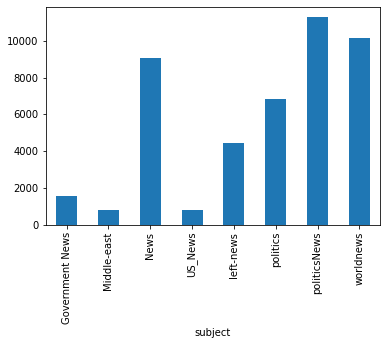

In [16]:
# how many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind='bar')
plt.show()

Target
fake    23481
true    21417
Name: text, dtype: int64


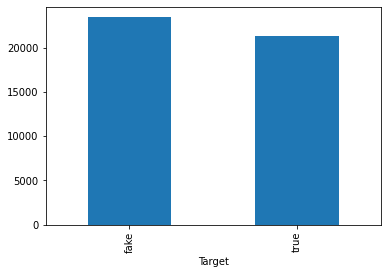

In [17]:
# how many fake and real artcles?
print(data.groupby(['Target'])['text'].count())
data.groupby(['Target'])['text'].count().plot(kind='bar')
plt.show()

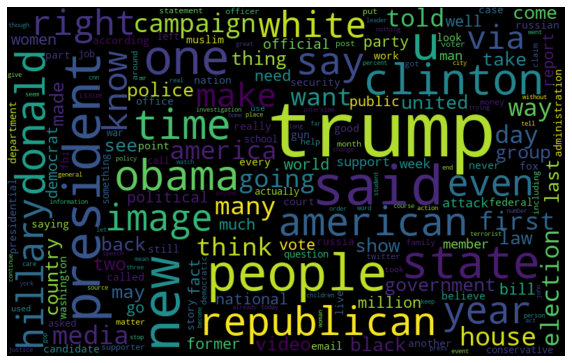

In [18]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["Target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

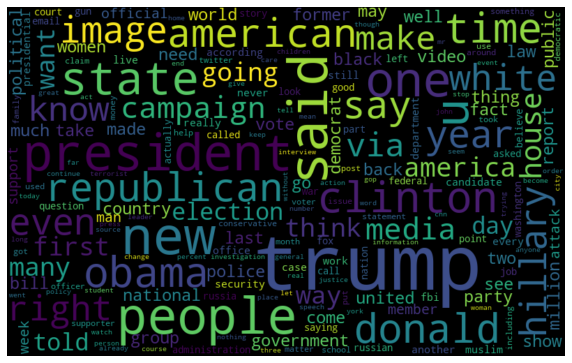

In [19]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["Target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

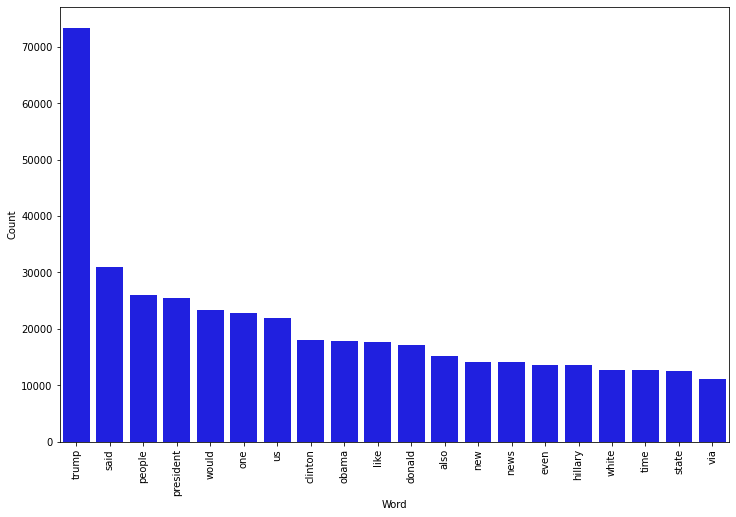

In [21]:
# Most frequent words in fake news
counter(data[data["Target"] == "fake"], "text", 20)

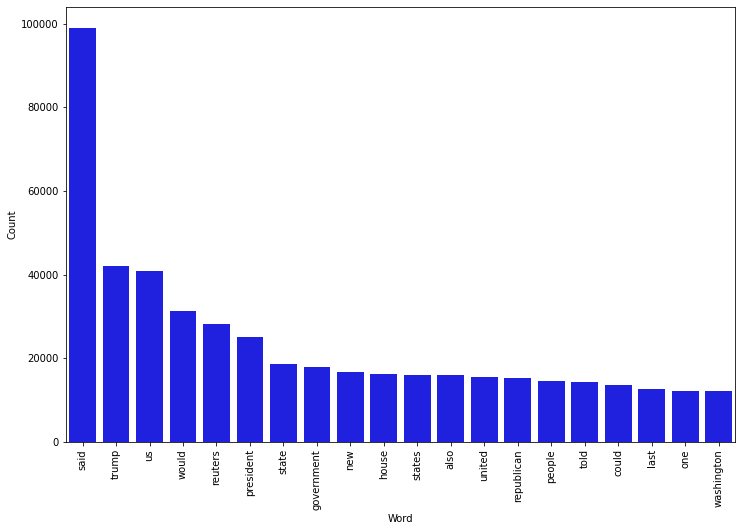

In [22]:
# Most frequent words in real news
counter(data[data["Target"] == "true"], "text", 20)

###### 

# Modeling

In [23]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

###### 

>__Preparing the Data:__

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(data['text'], data.Target, test_size=0.2, random_state=42)

###### 

# Logistic Regression

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(xv_train,Y_train)

LogisticRegression()

In [29]:
model1_pred = model1.predict(xv_test)

In [30]:
model1.score(xv_test,Y_test)

0.987750556792873

Confusion matrix, without normalization


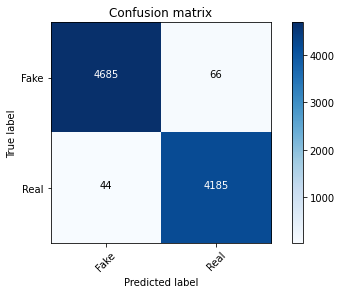

In [31]:
cm = metrics.confusion_matrix(Y_test, model1_pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

###### 

# Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
model2 = DecisionTreeClassifier()
model2.fit(xv_train,Y_train)

DecisionTreeClassifier()

In [34]:
model2_pred = model2.predict(xv_train)

In [35]:
model2.score(xv_test,Y_test)*100

99.81069042316258

##### 

# Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
model3 = RandomForestClassifier(random_state=0)
model3.fit(xv_train, Y_train)

RandomForestClassifier(random_state=0)

In [49]:
model3_pred = model4.predict(xv_test)

In [50]:
model3.score(xv_test, Y_test)

0.9919821826280624

In [51]:
print(classification_report(Y_test, model3_pred))

              precision    recall  f1-score   support

        fake       1.00      0.99      0.99      4751
        true       0.99      0.99      0.99      4229

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Confusion matrix, without normalization


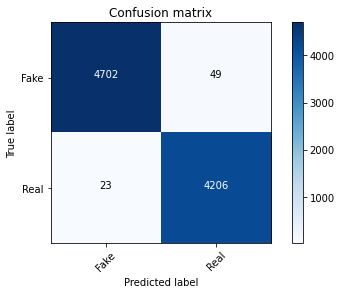

In [53]:
cm = metrics.confusion_matrix(Y_test, model3_pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Above we've used 3 models to optimize our prediction and __'Random Forest'__ and __'Desicision Tree'__ works best out of all